# Lab Instructions

Find a dataset that interests you. I'd recommend starting on [Kaggle](https://www.kaggle.com/). Read through all of the material about the dataset and download a .CSV file.

1. Write a short summary of the data.  Where did it come from?  How was it collected?  What are the features in the data?  Why is this dataset interesting to you?  

2. Identify 5 interesting questions about your data that you can answer using Pandas methods.  

3. Answer those questions!  You may use any method you want (including LLMs) to help you write your code; however, you should use Pandas to find the answers.  LLMs will not always write code in this way without specific instruction.  

4. Write the answer to your question in a text box underneath the code you used to calculate the answer.



In [6]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = r"C:\Users\sarac\OneDrive - Full Sail University\DVA\Lab1.5DataSet\ballistics.csv"

df = pd.read_csv(file_path)

df.head(25)

,Cartridge,Type,Weight,BC,V0,V100,V200,E0,E100,E200,BD100,BD200
0,44 REMINGTON MAGNUM,Rifle,225,0.145,1870,1416,1106.0,1747,1002,612.0,-5.2,-16.2
1,357 MAGNUM,Rifle,140,0.169,1850,1458,1165.0,1064,660,422.0,-5.0,-15.1
2,30 CARBINE,Rifle,110,0.178,2000,1601,1279.0,977,626,399.0,-4.0,-12.3
3,35 REMINGTON,Rifle,200,0.192,2080,1697,1375.0,1921,1279,839.0,-3.5,-10.8
4,45-70 GOVERNMENT,Rifle,325,0.230,2050,1730,1451.0,3032,2159,1519.0,-3.4,-10.2
5,450 BUSHMASTER,Rifle,250,0.210,2200,1835,1515.0,2686,1868,1274.0,-2.9,-9.0
6,32 WINCHESTER SPECIAL,Rifle,170,0.205,2250,1871,1539.0,1911,1321,894.0,-2.8,-8.6
7,458 WINCHESTER MAGNUM,Rifle,500,0.295,2140,1880,1643.0,5084,3924,2996.0,-2.8,-8.4
8,450 MARLIN,Rifle,325,0.230,2225,1887,1587.0,3572,2570,1816.0,-2.7,-8.4
9,30-30 WINCHESTER,Rifle,150,0.193,2390,1974,1608.0,1902,1298,861.0,-2.4,-7.6


### How much velocity and energy do pistol cartridges lose over 100 yds., on average?

Average (and median/std) pistol losses over 100 yd:
                     count    mean  median     std
vel_loss_100          71.0  172.01  153.00  109.00
vel_loss_pct_100      71.0   13.87   12.77    5.25
energy_loss_100       71.0  188.32  106.00  219.58
energy_loss_pct_100   71.0   25.70   24.05    9.40

Simple average values:
vel_loss_100           172.01
vel_loss_pct_100        13.87
energy_loss_100        188.32
energy_loss_pct_100     25.70


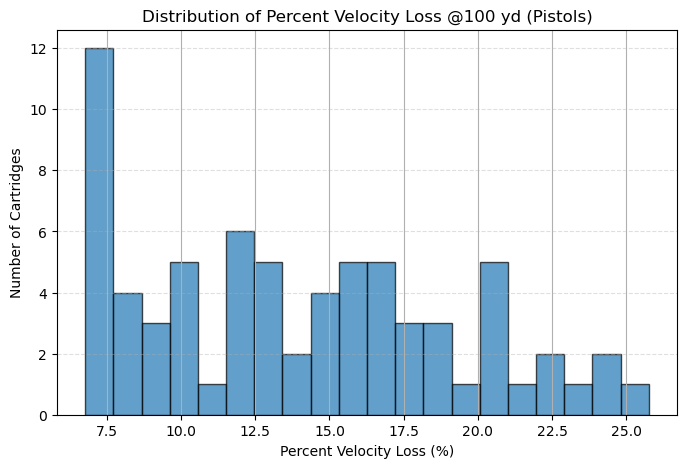

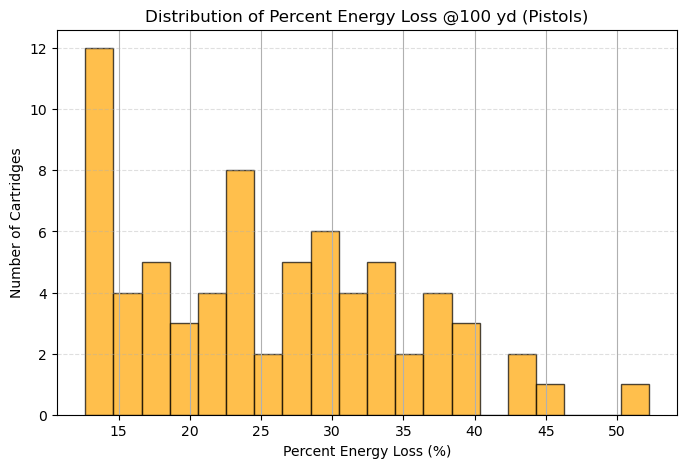

              vel_loss_100  energy_loss_100
Cartridge                                  
38 Long Colt          44.0             19.0
44 Russian            44.0             26.0
32 S&W                47.0             11.0
32 S&W Long           48.0             14.0
45 Schofield          51.0             28.0


In [15]:
mask = df['Type'].astype(str).str.contains(r'pistol|handgun|revolver', case=False, na=False)
pistols = df[mask].copy()

# Ensure numeric types for required columns
num_cols = ['V0','V100','E0','E100']
pistols[num_cols] = pistols[num_cols].apply(pd.to_numeric, errors='coerce')

# Drop rows missing required muzzle values to avoid garbage results
pistols = pistols.dropna(subset=['V0','V100','E0','E100'])

# Compute absolute and percent losses at 100 yd
pistols['vel_loss_100'] = pistols['V0'] - pistols['V100']
pistols['vel_loss_pct_100'] = pistols['vel_loss_100'] / pistols['V0'] * 100

pistols['energy_loss_100'] = pistols['E0'] - pistols['E100']
pistols['energy_loss_pct_100'] = pistols['energy_loss_100'] / pistols['E0'] * 100

# --- Aggregate (mean, median, std, count) ---
summary = pistols[['vel_loss_100','vel_loss_pct_100','energy_loss_100','energy_loss_pct_100']].agg(
    ['count','mean','median','std']).T

# Nicely format numeric values (rounding)
summary['mean'] = summary['mean'].round(2)
summary['median'] = summary['median'].round(2)
summary['std'] = summary['std'].round(2)

print("Average (and median/std) pistol losses over 100 yd:")
print(summary)

# Optional: overall means as scalar values for quick readability
means = pistols[['vel_loss_100','vel_loss_pct_100','energy_loss_100','energy_loss_pct_100']].mean().round(2)
print("\nSimple average values:")
print(means.to_string())

plt.figure(figsize=(8,5))
pistols['vel_loss_pct_100'].hist(bins=20, edgecolor='black', alpha=0.7)
plt.title('Distribution of Percent Velocity Loss @100 yd (Pistols)')
plt.xlabel('Percent Velocity Loss (%)')
plt.ylabel('Number of Cartridges')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()

plt.figure(figsize=(8,5))
pistols['energy_loss_pct_100'].hist(bins=20, edgecolor='black', alpha=0.7, color='orange')
plt.title('Distribution of Percent Energy Loss @100 yd (Pistols)')
plt.xlabel('Percent Energy Loss (%)')
plt.ylabel('Number of Cartridges')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()


avg_by_cartridge = pistols.groupby('Cartridge')[['vel_loss_100','energy_loss_100']].mean().sort_values('vel_loss_100')
print(avg_by_cartridge.head())  # smallest loss

### Conclusion
A large number cartridges only lose abour 7.5% of their velocity over 100 yards, which correlates well with the energy loss (which should be a factor of the velocity and the bullet weight). I've listed the top 5 cartridges with the lowest velocity percentage loss over distance.

### Does ballistic coefficient predict velocity or energy retention?

Correlation between BC and velocity retention @100 yd (all types): 0.824
Correlation between BC and energy retention @100 yd (all types): 0.836


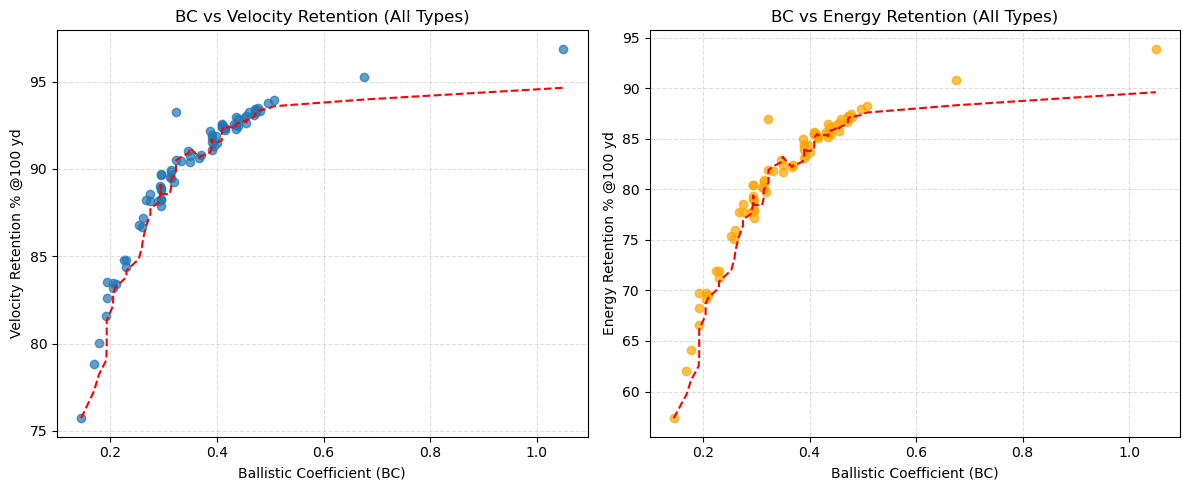

In [16]:
# Drop rows with missing values
df = df.dropna(subset=num_cols)

# --- Compute percent velocity and energy retention ---
df['vel_retention_pct_100'] = df['V100'] / df['V0'] * 100
df['energy_retention_pct_100'] = df['E100'] / df['E0'] * 100

# --- Correlation using pandas ---
vel_corr = df['BC'].corr(df['vel_retention_pct_100'])
energy_corr = df['BC'].corr(df['energy_retention_pct_100'])

print(f"Correlation between BC and velocity retention @100 yd (all types): {vel_corr:.3f}")
print(f"Correlation between BC and energy retention @100 yd (all types): {energy_corr:.3f}")

# --- Scatter plots ---
plt.figure(figsize=(12,5))

# Velocity retention
plt.subplot(1,2,1)
plt.scatter(df['BC'], df['vel_retention_pct_100'], alpha=0.7)
# Simple trend line: rolling mean by sorted BC
trend = df[['BC','vel_retention_pct_100']].sort_values('BC')
z = trend['vel_retention_pct_100'].rolling(5, min_periods=1).mean()
plt.plot(trend['BC'], z, color='red', linestyle='--')
plt.xlabel('Ballistic Coefficient (BC)')
plt.ylabel('Velocity Retention % @100 yd')
plt.title('BC vs Velocity Retention (All Types)')
plt.grid(True, linestyle='--', alpha=0.4)

# Energy retention
plt.subplot(1,2,2)
plt.scatter(df['BC'], df['energy_retention_pct_100'], alpha=0.7, color='orange')
trend2 = df[['BC','energy_retention_pct_100']].sort_values('BC')
z2 = trend2['energy_retention_pct_100'].rolling(5, min_periods=1).mean()
plt.plot(trend2['BC'], z2, color='red', linestyle='--')
plt.xlabel('Ballistic Coefficient (BC)')
plt.ylabel('Energy Retention % @100 yd')
plt.title('BC vs Energy Retention (All Types)')
plt.grid(True, linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()

### Conclusion
The upward trend followed by the leveling off of the plot indicates there are diminishing returns the higher the ballistic coefficient. Energy and velocity retention increases as BC goes up. This shows there is a sweet spot to target BC to get the best of both worlds without over engineering a cartridge.

### How does bullet weight affect muzzle velocity and muzzle energy for the 3 types of firearms listed?

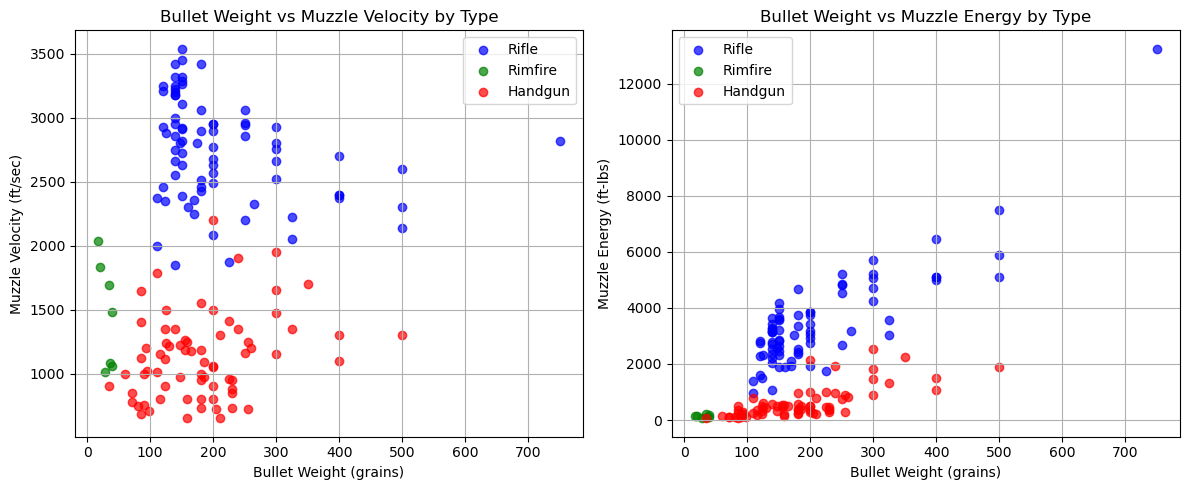


Top 5 Muzzle Velocity (Rifle):
                  Cartridge  Weight   V0
       300 WEATHERBY MAGNUM     150 3540
 300 REMINGTON ULTRA MAGNUM     150 3450
 7MM REMINGTON ULTRA MAGNUM     140 3425
    30-378 WEATHERBY MAGNUM     180 3420
300 WINCHESTER SHORT MAGNUM     150 3320

Top 5 Muzzle Energy (Rifle):
              Cartridge  Weight    E0
50 BROWNING MACHINE GUN     750 13241
   460 WEATHERBY MAGNUM     500  7504
   416 WEATHERBY MAGNUM     400  6474
               458 LOTT     500  5872
   378 WEATHERBY MAGNUM     300  5694

Top 5 Muzzle Velocity (Rimfire):
             Cartridge  Weight   V0
17 Hornady Mag Rimfire      17 2040
17 Hornady Mag Rimfire      20 1830
               .22 WMR      34 1690
               .22 WMR      40 1480
         22 Long Rifle      37 1085

Top 5 Muzzle Energy (Rimfire):
             Cartridge  Weight  E0
               .22 WMR      34 216
               .22 WMR      40 195
17 Hornady Mag Rimfire      17 157
17 Hornady Mag Rimfire      20 149
       

In [19]:
# Get unique cartridge types
types = df['Type'].unique()
colors = ['blue', 'green', 'red']  # adjust if more than 3 types
color_map = dict(zip(types, colors))

plt.figure(figsize=(12,5))

# --- Bullet Weight vs Muzzle Velocity ---
plt.subplot(1, 2, 1)
for t in types:
    subset = df[df['Type'] == t]
    plt.scatter(subset['Weight'], subset['V0'], label=t, color=color_map[t], alpha=0.7)
plt.xlabel('Bullet Weight (grains)')
plt.ylabel('Muzzle Velocity (ft/sec)')
plt.title('Bullet Weight vs Muzzle Velocity by Type')
plt.legend()
plt.grid(True)

# --- Bullet Weight vs Muzzle Energy ---
plt.subplot(1, 2, 2)
for t in types:
    subset = df[df['Type'] == t]
    plt.scatter(subset['Weight'], subset['E0'], label=t, color=color_map[t], alpha=0.7)
plt.xlabel('Bullet Weight (grains)')
plt.ylabel('Muzzle Energy (ft-lbs)')
plt.title('Bullet Weight vs Muzzle Energy by Type')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


# --- Print top 5 for velocity and energy by type ---
for t in types:
    subset = df[df['Type'] == t]
    
    top5_v = subset.nlargest(5, 'V0')[['Cartridge', 'Weight', 'V0']]
    top5_e = subset.nlargest(5, 'E0')[['Cartridge', 'Weight', 'E0']]
    
    print(f"\nTop 5 Muzzle Velocity ({t}):")
    print(top5_v.to_string(index=False))
    
    print(f"\nTop 5 Muzzle Energy ({t}):")
    print(top5_e.to_string(index=False))

### Conclusion: 
Velocity is typically higher in rifle rounds, which make sense since they have more room for powder in the cartridge. The muzzle energy (E0) is very much dependent on bullet weight, which is especially apparent in the handgun cartridges, though going too heavy limits the energy due to restrictions on the quantity of powder each cartridge can hold.

### Which cartridges produce the highest energy at 200 yds.?

Top 10 rifle cartridges by energy at 200 yds (E200):


,Cartridge,Weight,E200
0,50 BROWNING MACHINE GUN,750,11661.0
1,460 WEATHERBY MAGNUM,500,4610.0
2,416 WEATHERBY MAGNUM,400,4116.0
3,338 LAPUA,250,3999.0
4,338-378 WEATHERBY MAGNUM,250,3936.0
5,375 WEATHERBY MAGNUM,300,3701.0
6,30-378 WEATHERBY MAGNUM,180,3637.0
7,340 WEATHERBY MAGNUM,250,3621.0
8,458 LOTT,500,3509.0
9,378 WEATHERBY MAGNUM,300,3466.0


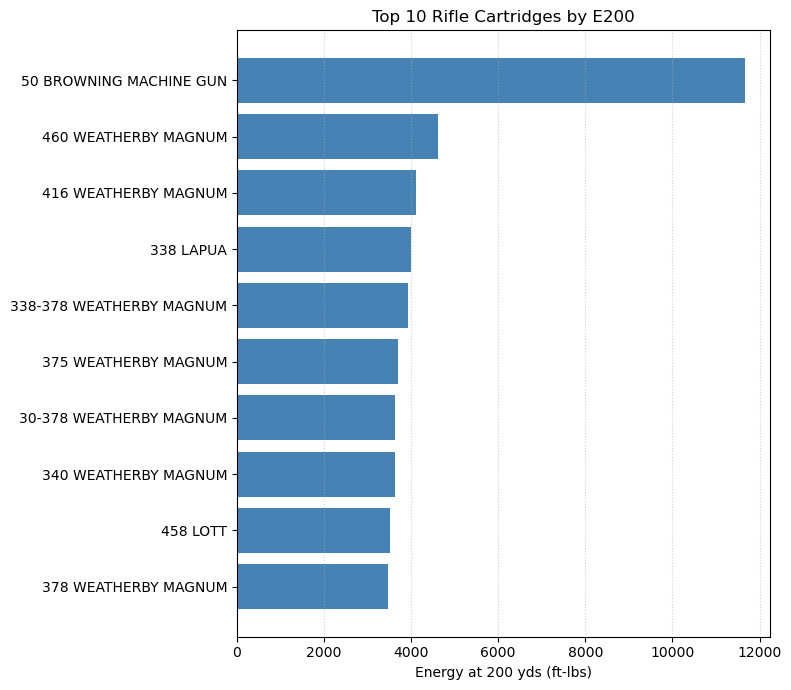

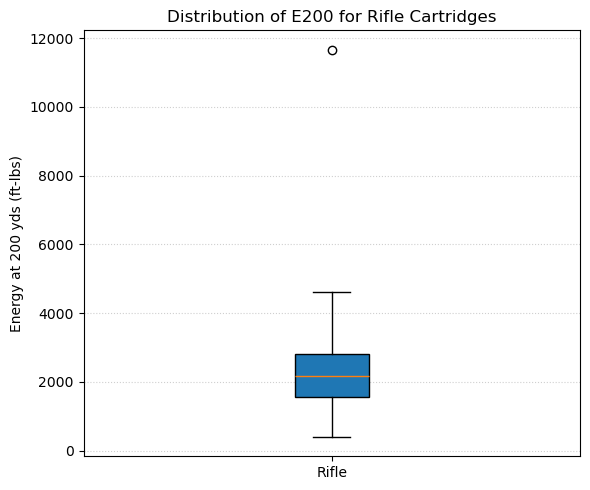


Top rifle cartridges by E200 (Cartridge — Weight gr — E200 ft-lbs):
  - 50 BROWNING MACHINE GUN — 750 gr — 11661.0 ft-lbs
  - 460 WEATHERBY MAGNUM — 500 gr — 4610.0 ft-lbs
  - 416 WEATHERBY MAGNUM — 400 gr — 4116.0 ft-lbs
  - 338 LAPUA — 250 gr — 3999.0 ft-lbs
  - 338-378 WEATHERBY MAGNUM — 250 gr — 3936.0 ft-lbs
  - 375 WEATHERBY MAGNUM — 300 gr — 3701.0 ft-lbs
  - 30-378 WEATHERBY MAGNUM — 180 gr — 3637.0 ft-lbs
  - 340 WEATHERBY MAGNUM — 250 gr — 3621.0 ft-lbs
  - 458 LOTT — 500 gr — 3509.0 ft-lbs
  - 378 WEATHERBY MAGNUM — 300 gr — 3466.0 ft-lbs


In [25]:
# === Parameters ===
TOP_N = 10   # how many top rifle cartridges to show

# === Normalize Type column and filter rifles ===
df['Type_clean'] = df['Type'].astype(str).str.strip().str.lower()  # remove spaces and lowercase
df_rifle = df[df['Type_clean'] == 'rifle'].copy()

# Ensure E200 is numeric
df_rifle['E200'] = pd.to_numeric(df_rifle['E200'], errors='coerce')

# Drop rows missing key data
df_rifle = df_rifle.dropna(subset=['E200', 'Cartridge', 'Weight']).reset_index(drop=True)

# === Top rifle cartridges by E200 ===
top_rifle = df_rifle.sort_values('E200', ascending=False).head(TOP_N)[
    ['Cartridge', 'Weight', 'E200']
].reset_index(drop=True)

print(f"Top {TOP_N} rifle cartridges by energy at 200 yds (E200):")
display(top_rifle)

# === Plots ===
import matplotlib.pyplot as plt
plt.style.use('default')

# --- a) Horizontal bar chart of top rifles ---
fig, ax = plt.subplots(figsize=(8, TOP_N * 0.5 + 2))
plot_data = top_rifle.sort_values('E200', ascending=True)  # horizontal bars sorted ascending
ax.barh(plot_data['Cartridge'], plot_data['E200'], color='steelblue')
ax.set_xlabel('Energy at 200 yds (ft-lbs)')
ax.set_title(f'Top {TOP_N} Rifle Cartridges by E200')
ax.grid(axis='x', linestyle=':', alpha=0.6)
plt.tight_layout()
plt.show()

# --- b) Boxplot of all rifle E200 values ---
fig, ax = plt.subplots(figsize=(6, 5))
ax.boxplot([df_rifle['E200']], tick_labels=['Rifle'], vert=True, patch_artist=True)
ax.set_ylabel('Energy at 200 yds (ft-lbs)')
ax.set_title('Distribution of E200 for Rifle Cartridges')
ax.grid(axis='y', linestyle=':', alpha=0.6)
plt.tight_layout()
plt.show()

# --- Optional: formatted top list ---
print("\nTop rifle cartridges by E200 (Cartridge — Weight gr — E200 ft-lbs):")
for _, row in top_rifle.iterrows():
    print(f"  - {row['Cartridge']} — {row['Weight']} gr — {row['E200']:.1f} ft-lbs")


### Conclusion
The data set doesn't include any data on the rimfire or pistol cartridges at 200 yards, so I limited this question to just rifles. By a wide margin, the most powerful round in the data set is the 50 caliber Browning round. It is the both the heaviest and fastest bullet at 200 yards, meaning it imparts the most terminal energy. In fact, it is so powerful, it is an extreme outlier compared to the rest of the data set, as shown in the box plot.

### How do different firearm types compare in muzzle velocity and muzzle energy?

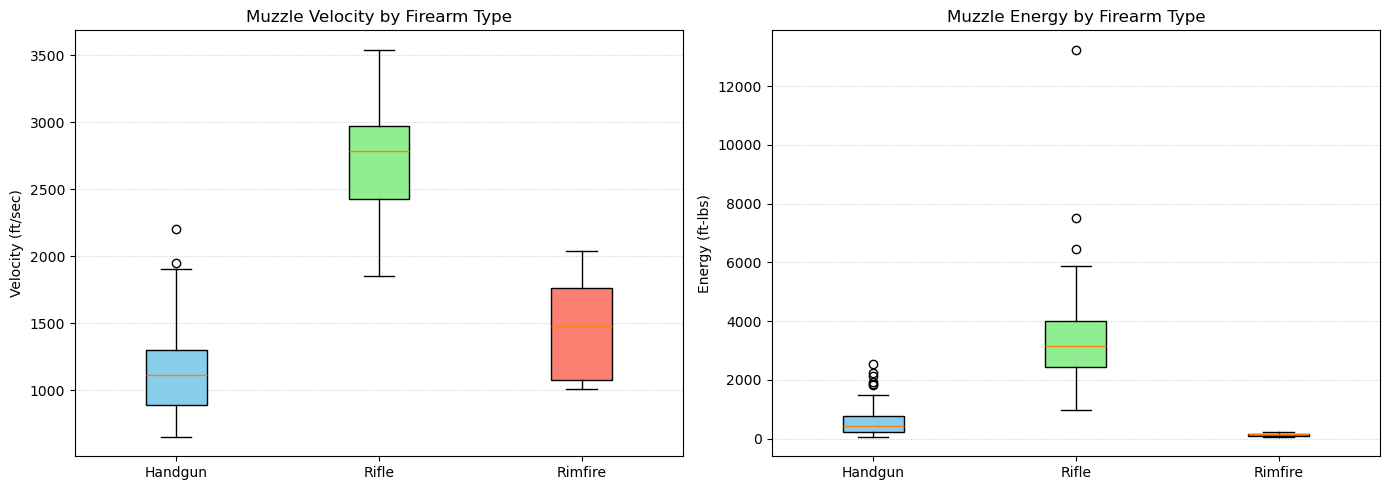

Summary of muzzle velocity (V0) and muzzle energy (E0) by firearm type:


,count,V0_mean,V0_median,E0_mean,E0_median
Type_clean,,,,,
Rifle,76,2742.144737,2787.5,3457.184211,3155.5
Rimfire,7,1456.428571,1480.0,140.000000,149.0
Handgun,71,1134.084507,1110.0,611.760563,427.0


In [28]:
# Normalize Type column
df['Type_clean'] = df['Type'].astype(str).str.strip().str.title()  # e.g., Rifle, Pistol, Rimfire

# Unique types and colors
types = sorted(df['Type_clean'].unique())
colors = ['skyblue', 'lightgreen', 'salmon']  # assign colors to types
color_map = dict(zip(types, colors))

# Prepare data for boxplots
V0_data = [df[df['Type_clean'] == t]['V0'].values for t in types]
E0_data = [df[df['Type_clean'] == t]['E0'].values for t in types]

# === 1) Color-coded boxplots ===
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Muzzle velocity
bp_v0 = axes[0].boxplot(V0_data, patch_artist=True, tick_labels=types)
for patch, t in zip(bp_v0['boxes'], types):
    patch.set_facecolor(color_map[t])
axes[0].set_title('Muzzle Velocity by Firearm Type')
axes[0].set_ylabel('Velocity (ft/sec)')
axes[0].grid(axis='y', linestyle=':', alpha=0.6)

# Muzzle energy
bp_e0 = axes[1].boxplot(E0_data, patch_artist=True, tick_labels=types)
for patch, t in zip(bp_e0['boxes'], types):
    patch.set_facecolor(color_map[t])
axes[1].set_title('Muzzle Energy by Firearm Type')
axes[1].set_ylabel('Energy (ft-lbs)')
axes[1].grid(axis='y', linestyle=':', alpha=0.6)

plt.tight_layout()
plt.show()

# === 2) Summary statistics by Type ===
summary = df.groupby('Type_clean').agg(
    count=('Cartridge','count'),
    V0_mean=('V0','mean'),
    V0_median=('V0','median'),
    E0_mean=('E0','mean'),
    E0_median=('E0','median')
).sort_values('V0_mean', ascending=False)

print("Summary of muzzle velocity (V0) and muzzle energy (E0) by firearm type:")
display(summary)


### Conclusion
As was expected, rifles have the highest muzzle energy and velocity values. The surprising part is the velocities of rimfire cartridges, which are higher, on average, than the handgun rounds, though less powerful due to the bullet weight.